## Example 4

Import modules and configure matplotlib output to notebook.

In [1]:
import re
import io
import os
import tempfile
import matplotlib.pyplot as plt
import matplotlib.image as mpim

import jonga

%matplotlib inline

Construct call tracer object with groups defined by the first part (i.e. before the first '.') of the fully qualified name of the function

In [2]:
ct = jonga.CallTracer(dstmodflt='^(re.|sre_)', grpflt='^[^\.]*')

Define graph construction option variables

In [3]:
size='32,32'
fntsz = 12
fntfm = 'Vera Sans, DejaVu Sans, Liberation Sans, Arial, Helvetica, sans'

Get path of temporary file for graph image

In [4]:
fd, pth = tempfile.mkstemp(suffix='.png')
os.close(fd)

Use context manager wrapper of call tracer to trace regex compile function and write a corresponding call graph image

In [5]:
with jonga.ContextCallTracer(ct, pth, size=size, fntsz=fntsz, fntfm=fntfm):
    rc = re.compile('^[^\.]*.[^\.]*')

Read graph image and display it

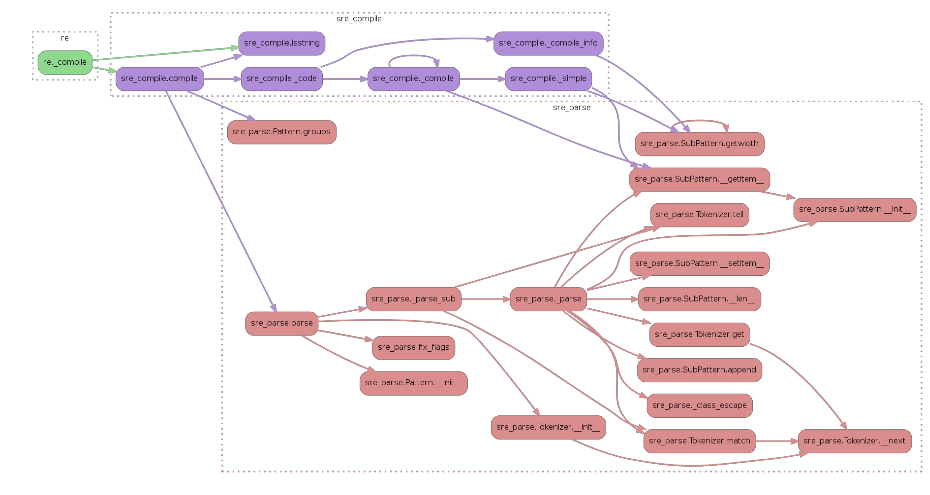

In [6]:
img = mpim.imread(pth)
fig = plt.figure(figsize=(16,16))
axim = plt.imshow(img)
ax = plt.axis('off')
plt.show()

Delete temporary image file

In [7]:
os.remove(pth)